## Import Libraries

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import math

In [12]:
import os
os.getcwd()

'C:\\Users\\mutya'

## Data Source

Loan Default Dataset: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

In [7]:
loanDF = pd.read_csv('./../../datasets/Loan_Default.csv')

In [8]:
loanDF.shape

(148670, 34)

In [9]:
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
loanDF.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning/Processing

### (1) Dropping unwanted columns

In [8]:
col_to_drop = ['ID', 'year', 'lump_sum_payment']
loanDF.drop(columns=col_to_drop, axis=1, inplace=True)

In [9]:
loanDF.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Security_Type', 'Status', 'dtir1'],
      dtype='object')

### (2) Handling missing values

In [10]:
loanDF.shape

(148670, 31)

In [11]:
loanDF.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type       

In [12]:
col_missingval_numeric = []
col_missingval_ctgy = []

for col in loanDF.columns:
    if loanDF[col].isna().sum() > 0:
        if loanDF[col].dtype == 'object':
            col_missingval_ctgy.append(col)
        else:
            col_missingval_numeric.append(col)
            
print('Numerical columns: ', col_missingval_numeric)
print('Categorical columns: ', col_missingval_ctgy)

Numerical columns:  ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']
Categorical columns:  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization', 'age', 'submission_of_application']


In [11]:
# handling missing values in the numerical columns
loanDF[col_missingval_numeric] = loanDF[col_missingval_numeric].fillna(value=round(loanDF[col_missingval_numeric].mean(), 3))

In [12]:
loanDF[col_missingval_numeric].describe()

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1
count,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000
mean,4.045359,0.441741,3224.996093,335.136582,4.978935e+05,6957.338884,72.746411,37.732943
std,0.487764,0.445359,2784.133285,58.401029,3.411696e+05,6293.492004,37.883839,9.652119
min,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,0.967478,5.000000
25%,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,63.297872,33.000000
50%,4.045000,0.442000,3224.996000,360.000000,4.580000e+05,6000.000000,73.026316,37.733000
75%,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,84.722222,44.000000
max,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,7831.250000,61.000000


In [13]:
loanDF[col_missingval_ctgy].describe()

,loan_limit,approv_in_adv,loan_purpose,Neg_ammortization,age,submission_of_application
count,145326,147762,148536,148549,148470,148470
unique,2,2,4,2,7,2
top,cf,nopre,p3,not_neg,45-54,to_inst
freq,135348,124621,55934,133420,34720,95814


In [14]:
# handling missing values in the categorical columns
loanDF[col_missingval_ctgy] = loanDF[col_missingval_ctgy].fillna(value=loanDF[col_missingval_ctgy].mode().iloc[0])

In [15]:
sum(loanDF.isnull().sum())

0

### (3) Feature Engineering

In [16]:
loanDF['loan_amount_to_property'] = loanDF['loan_amount']/loanDF['property_value']

### (4) Rename columns

In [17]:
loanDF.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'property_value', 'construction_type', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Security_Type', 'Status', 'dtir1',
       'loan_amount_to_property'],
      dtype='object')

In [18]:
loanDF.columns = loanDF.rename(columns=str.lower).columns

In [19]:
loanDF.columns = loanDF.columns.str.replace('-', '_')

In [20]:
loanDF.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'property_value', 'construction_type', 'occupancy_type', 'secured_by',
       'total_units', 'income', 'credit_type', 'credit_score',
       'co_applicant_credit_type', 'age', 'submission_of_application', 'ltv',
       'region', 'security_type', 'status', 'dtir1',
       'loan_amount_to_property'],
      dtype='object')

### (5) Formatting values in categorical columns

In [21]:
for col in loanDF.columns:
    if loanDF[col].dtype == 'object':
        print(col, dict(loanDF[col].value_counts()))

loan_limit {'cf': 138692, 'ncf': 9978}
gender {'Male': 42346, 'Joint': 41399, 'Sex Not Available': 37659, 'Female': 27266}
approv_in_adv {'nopre': 125529, 'pre': 23141}
loan_type {'type1': 113173, 'type2': 20762, 'type3': 14735}
loan_purpose {'p3': 56068, 'p4': 54799, 'p1': 34529, 'p2': 3274}
credit_worthiness {'l1': 142344, 'l2': 6326}
open_credit {'nopc': 148114, 'opc': 556}
business_or_commercial {'nob/c': 127908, 'b/c': 20762}
neg_ammortization {'not_neg': 133541, 'neg_amm': 15129}
interest_only {'not_int': 141560, 'int_only': 7110}
construction_type {'sb': 148637, 'mh': 33}
occupancy_type {'pr': 138201, 'ir': 7340, 'sr': 3129}
secured_by {'home': 148637, 'land': 33}
total_units {'1U': 146480, '2U': 1477, '3U': 393, '4U': 320}
credit_type {'CIB': 48152, 'CRIF': 43901, 'EXP': 41319, 'EQUI': 15298}
co_applicant_credit_type {'CIB': 74392, 'EXP': 74278}
age {'45-54': 34920, '35-44': 32818, '55-64': 32534, '65-74': 20744, '25-34': 19142, '>74': 7175, '<25': 1337}
submission_of_applicati

In [22]:
loanDF['gender'] = loanDF['gender'].str.replace('Sex Not Available', 'unknown')

# To avoid creating multiple columns of same values, in onehot-encoding.
loanDF['gender'] = loanDF['gender'].str.lower() 

In [23]:
loanDF['total_units'] = loanDF['total_units'].str.replace('U', '').astype(int)
loanDF['age'] = loanDF['age'].str.replace('>', 'over')
loanDF['age'] = loanDF['age'].str.replace('<', 'under')
loanDF['region'] = loanDF['region'].str.replace('-', '_')
loanDF['region'] = loanDF['region'].str.lower()
loanDF['security_type'] = loanDF['security_type'].str.lower()

In [24]:
for col in loanDF.columns:
    if loanDF[col].dtype == 'object':
        print(col, dict(loanDF[col].value_counts()))

loan_limit {'cf': 138692, 'ncf': 9978}
gender {'male': 42346, 'joint': 41399, 'unknown': 37659, 'female': 27266}
approv_in_adv {'nopre': 125529, 'pre': 23141}
loan_type {'type1': 113173, 'type2': 20762, 'type3': 14735}
loan_purpose {'p3': 56068, 'p4': 54799, 'p1': 34529, 'p2': 3274}
credit_worthiness {'l1': 142344, 'l2': 6326}
open_credit {'nopc': 148114, 'opc': 556}
business_or_commercial {'nob/c': 127908, 'b/c': 20762}
neg_ammortization {'not_neg': 133541, 'neg_amm': 15129}
interest_only {'not_int': 141560, 'int_only': 7110}
construction_type {'sb': 148637, 'mh': 33}
occupancy_type {'pr': 138201, 'ir': 7340, 'sr': 3129}
secured_by {'home': 148637, 'land': 33}
credit_type {'CIB': 48152, 'CRIF': 43901, 'EXP': 41319, 'EQUI': 15298}
co_applicant_credit_type {'CIB': 74392, 'EXP': 74278}
age {'45-54': 34920, '35-44': 32818, '55-64': 32534, '65-74': 20744, '25-34': 19142, 'over74': 7175, 'under25': 1337}
submission_of_application {'to_inst': 96014, 'not_inst': 52656}
region {'north': 74722,

### (6) Handling outliers in numerical columns

In [25]:
sns.set_theme(style="ticks")

In [26]:
sns.__version__ # 0.12 has the issue with annotaions
# !pip install seaborn --upgrade

'0.13.2'

In [27]:
def get_numeric_categorical_cols(df):
    categorical_cols = df.columns[df.dtypes == "object"].tolist()
    numeric_cols = df.columns[df.dtypes != "object"].tolist()
    return numeric_cols, categorical_cols

numeric_cols, categorical_cols = get_numeric_categorical_cols(loanDF)
print(f"No.of numerical columns: {len(numeric_cols)}")
print(f"numerical columns: {numeric_cols}")

No.of numerical columns: 13
numerical columns: ['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'total_units', 'income', 'credit_score', 'ltv', 'status', 'dtir1', 'loan_amount_to_property']


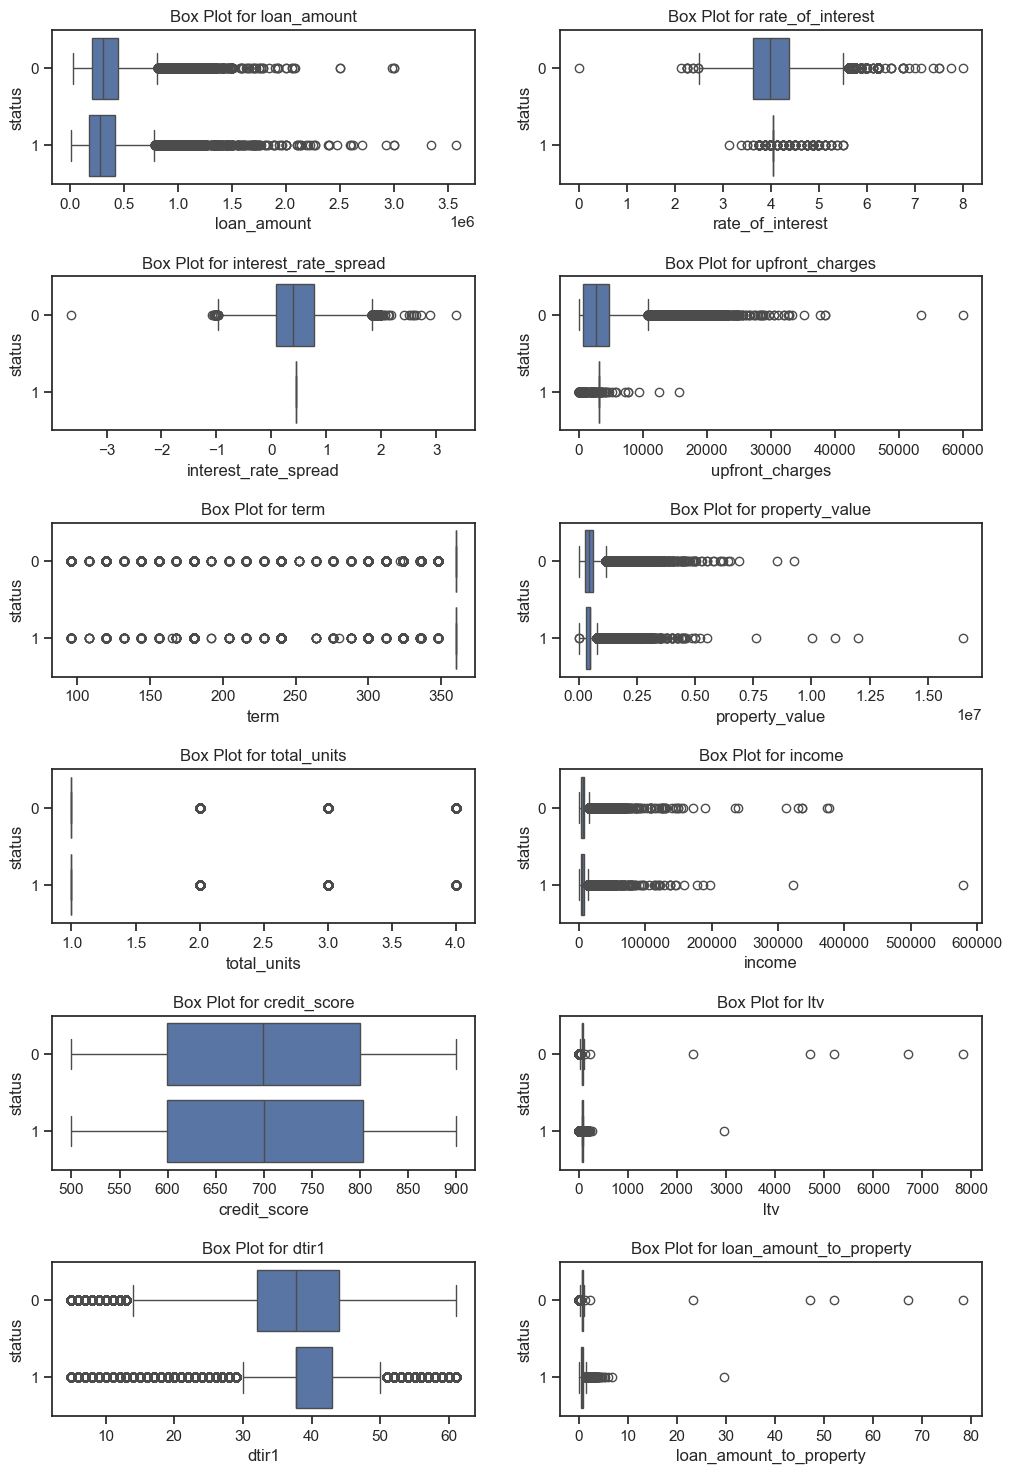

In [28]:
#Box Plot to analyse variability in the numerical columns

# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.6)  # Adjust vertical spacing

if 'status' in numeric_cols:
    # To skip the status in box plot
    numeric_cols.remove('status')
    
for ax, col in zip(np.ravel(axes), numeric_cols):
    if col=='status':
        continue
    sns.boxplot(x=col, y='status', data=loanDF, orient='h', ax=ax)
    ax.set_title(f'Box Plot for {col}')

if 'status' not in numeric_cols:
    numeric_cols.append('status')

plt.savefig('../plots/Box plot for numerical variables')
# Show the plots
plt.show()

In [29]:
# View the data in the 'status' column as percentage
ones_perc = (loanDF.status.sum()/loanDF.shape[0])*100
print(f"ones% = {ones_perc:.2f}%, zeros% = {100-ones_perc:.2f}%")

ones% = 24.64%, zeros% = 75.36%


In [30]:
# Handling Outliers

# (1) Using Z-score
zscore_threshold = 3

def outlier_zscore(col, threshold=3):
    z_scores = (col-col.mean())/col.std()
    return (z_scores>threshold)

loanDF['outlier_flag_zscore'] = np.any(
        [outlier_zscore(loanDF[col], threshold=zscore_threshold) for col in numeric_cols],
        axis=0)

# (2) Using IQR
threshold_iqr = 5

def outliers_iqr(col:pd.Series, threshold=3):
    q1, q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = q3-q1
    lower, upper = q1-threshold*IQR, q3+threshold*IQR
    return ((col<lower) | (col>upper))

loanDF['outlier_flag_iqr'] = np.any(
        [outliers_iqr(loanDF[col], threshold=threshold_iqr) for col in numeric_cols],
        axis=0)

In [31]:
total = loanDF.shape[0]
perc_outlier_zscore = loanDF['outlier_flag_zscore'].sum()*100/total
perc_outlier_iqr = loanDF['outlier_flag_iqr'].sum()*100/total

print("Total no.of records marked as outliers")
print(f"(1) Using Z-score: {perc_outlier_zscore=:.2f}%\n(2) Using IQR: {perc_outlier_iqr=:.2f}%")

Total no.of records marked as outliers
(1) Using Z-score: perc_outlier_zscore=6.34%
(2) Using IQR: perc_outlier_iqr=39.66%


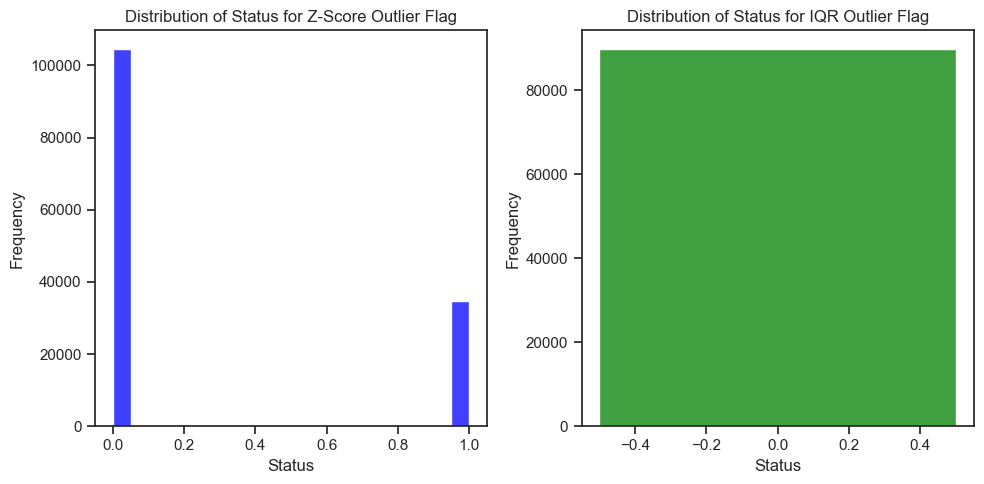

In [32]:
# Setting up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# histograms for 'status' based on 'outlier_flag_zscore' condition
sns.histplot(loanDF[loanDF['outlier_flag_zscore'] == 0]['status'], kde=False, label='Z-Score', color='blue', ax=axes[0])
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Status for Z-Score Outlier Flag')

# histograms for 'status' based on 'outlier_flag_iqr' condition
sns.histplot(loanDF[loanDF['outlier_flag_iqr'] == 0]['status'], kde=False, label='IQR', color='green', ax=axes[1])
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Status for IQR Outlier Flag')

plt.tight_layout()

plt.savefig('../plots/Distribution of Status for IQR Outlier Flag - Bar.png')

plt.show()

#### Using IQR is treating all the `status=1` as outliers, so use Z-score instead of IQR

In [33]:
loanDF_cleaned = loanDF[loanDF['outlier_flag_zscore'] == 0].copy()

In [34]:
loanDF_cleaned.drop(['outlier_flag_iqr', 'outlier_flag_zscore'], axis=1, inplace=True)

### Splitting to Categorical and Numerical

In [35]:
numerical_df = loanDF_cleaned[numeric_cols].copy()
categorical_df = loanDF_cleaned[categorical_cols].copy()

### (8) Converting Datatype of Age

In [36]:
print(f'Categorical Columns: {categorical_cols}')
categorical_df['status'] = numerical_df['status']

Categorical Columns: ['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'construction_type', 'occupancy_type', 'secured_by', 'credit_type', 'co_applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type']


In [37]:
# Understand the `age` column
categorical_df.age.unique() 

array(['25-34', '55-64', '35-44', '45-54', '65-74', 'over74', 'under25'],
      dtype=object)

In [38]:
# We can use ordinal encoding for age, as increasing values signify higher ages.
age_encoding = {'under25': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, 'over74': 7}

# Replace values in the 'age' column using the age_encoding dictionary
categorical_df['age'] = categorical_df['age'].map(age_encoding)

# Display the updated DataFrame
print(categorical_df['age'].dtype)

int64


### (7) Normalizing numerical features

In [39]:
numerical_df['age'] = categorical_df['age'] # Moving age to numerical features.
categorical_df.drop('age', axis=1, inplace=True)

In [40]:
numerical_df.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'total_units', 'income',
       'credit_score', 'ltv', 'dtir1', 'loan_amount_to_property', 'status',
       'age'],
      dtype='object')

In [41]:
# Apply robust scaling to the features
rob_scaler = RobustScaler()
numerical_df_scaled = pd.DataFrame(rob_scaler.fit_transform(numerical_df), columns=numerical_df.columns)

In [42]:
numerical_df_scaled.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,total_units,income,credit_score,ltv,dtir1,loan_amount_to_property,status,age
0,-0.772727,0.00,0.000000,0.000000,0.0,-1.103448,0.0,-1.000000,0.295,1.213740,0.7267,0.869909,1.0,-1.0
1,-0.363636,0.00,0.000000,0.000000,0.0,0.206529,0.0,-0.217391,-0.735,-0.038208,0.0000,-1.235899,1.0,0.5
2,0.545455,1.03,-0.567942,-1.043074,0.0,0.241379,0.0,0.869565,0.675,0.312265,0.8267,0.181786,0.0,-0.5
3,0.772727,0.41,0.560901,0.000000,0.0,0.758621,0.0,1.449275,-0.560,-0.200543,0.4267,-0.209656,0.0,0.0
4,1.863636,-0.09,-0.323398,-1.279055,0.0,1.103448,0.0,1.101449,-0.485,0.884054,0.1267,0.618250,0.0,-1.0


### (9) Categorical Encoding

In [43]:
categorical_df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'construction_type',
       'occupancy_type', 'secured_by', 'credit_type',
       'co_applicant_credit_type', 'submission_of_application', 'region',
       'security_type', 'status'],
      dtype='object')

In [44]:
# Create OneHotEncoder with drop='first' to avoid multi-collinearity
cat_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transform the data using One-hot encoding
categorical_df_encoded = pd.DataFrame(cat_encoder.fit_transform(categorical_df), columns=cat_encoder.get_feature_names_out())

In [45]:
# Removing status column from categorical dataframe
categorical_df_encoded.drop(['status_1'], axis=1, inplace=True)

In [46]:
categorical_df_encoded.head()

,loan_limit_ncf,gender_joint,gender_male,gender_unknown,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,...,secured_by_land,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co_applicant_credit_type_EXP,submission_of_application_to_inst,region_north,region_north_east,region_south,security_type_indriect
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### (10) Concat the numerical and categorical dataframes

In [47]:
loanDF_preprocessed = pd.concat([numerical_df_scaled, categorical_df_encoded], axis=1)

In [48]:
loanDF_preprocessed.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'total_units', 'income',
       'credit_score', 'ltv', 'dtir1', 'loan_amount_to_property', 'status',
       'age', 'loan_limit_ncf', 'gender_joint', 'gender_male',
       'gender_unknown', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'credit_worthiness_l2', 'open_credit_opc',
       'business_or_commercial_nob/c', 'neg_ammortization_not_neg',
       'interest_only_not_int', 'construction_type_sb', 'occupancy_type_pr',
       'occupancy_type_sr', 'secured_by_land', 'credit_type_CRIF',
       'credit_type_EQUI', 'credit_type_EXP', 'co_applicant_credit_type_EXP',
       'submission_of_application_to_inst', 'region_north',
       'region_north_east', 'region_south', 'security_type_indriect'],
      dtype='object')

In [49]:
loanDF_preprocessed.shape

(139251, 42)

In [50]:
loanDF_preprocessed.to_csv('../datasets/Loan_Default_cleaned.csv', index=False)

### (11) Handling Imbalanced Dataset

In [51]:
# Undersampling

# Separate the majority and minority classes
df_majority = loanDF_preprocessed[loanDF_preprocessed['status'] == 0]
df_minority = loanDF_preprocessed[loanDF_preprocessed['status'] == 1]

print(f'No.of status 0: {len(df_majority)}')
print(f'No.of status 1: {len(df_minority)}')

# Downsample the majority class to match the number of samples in the minority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine the downsampled majority class with the original minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

No.of status 0: 104458
No.of status 1: 34793


In [52]:
df_downsampled.shape

(69586, 42)

In [53]:
# count the data entries in the 'status' column
print(dict(df_downsampled['status'].value_counts()))

{1.0: 34793, 0.0: 34793}


## Save cleaned data

In [54]:
df_downsampled.to_csv('../datasets/Loan_Default_cleaned_downsampled.csv', index=False)

## Exploratory Data Analysis (EDA)

In [57]:
loanDF = pd.read_csv('../datasets/Loan_Default_cleaned.csv')

### (1) Analyzing numerical features

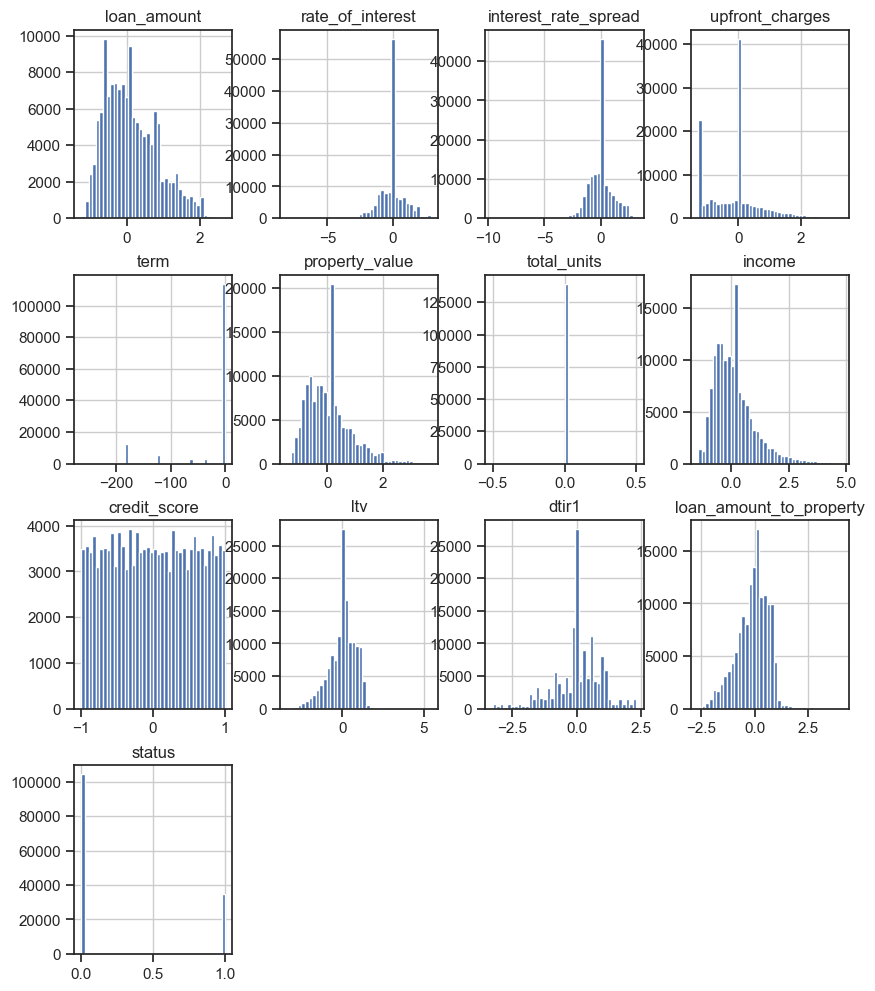

In [58]:
_=loanDF[numeric_cols].hist(bins=40, figsize=(10,12))
plt.title("Distribution of Numerical Features-hist")
plt.savefig('../plots/1-Distribution of Numerical Features-hist.png')
plt.show()

### (2) Analyzing density of numerical features by status

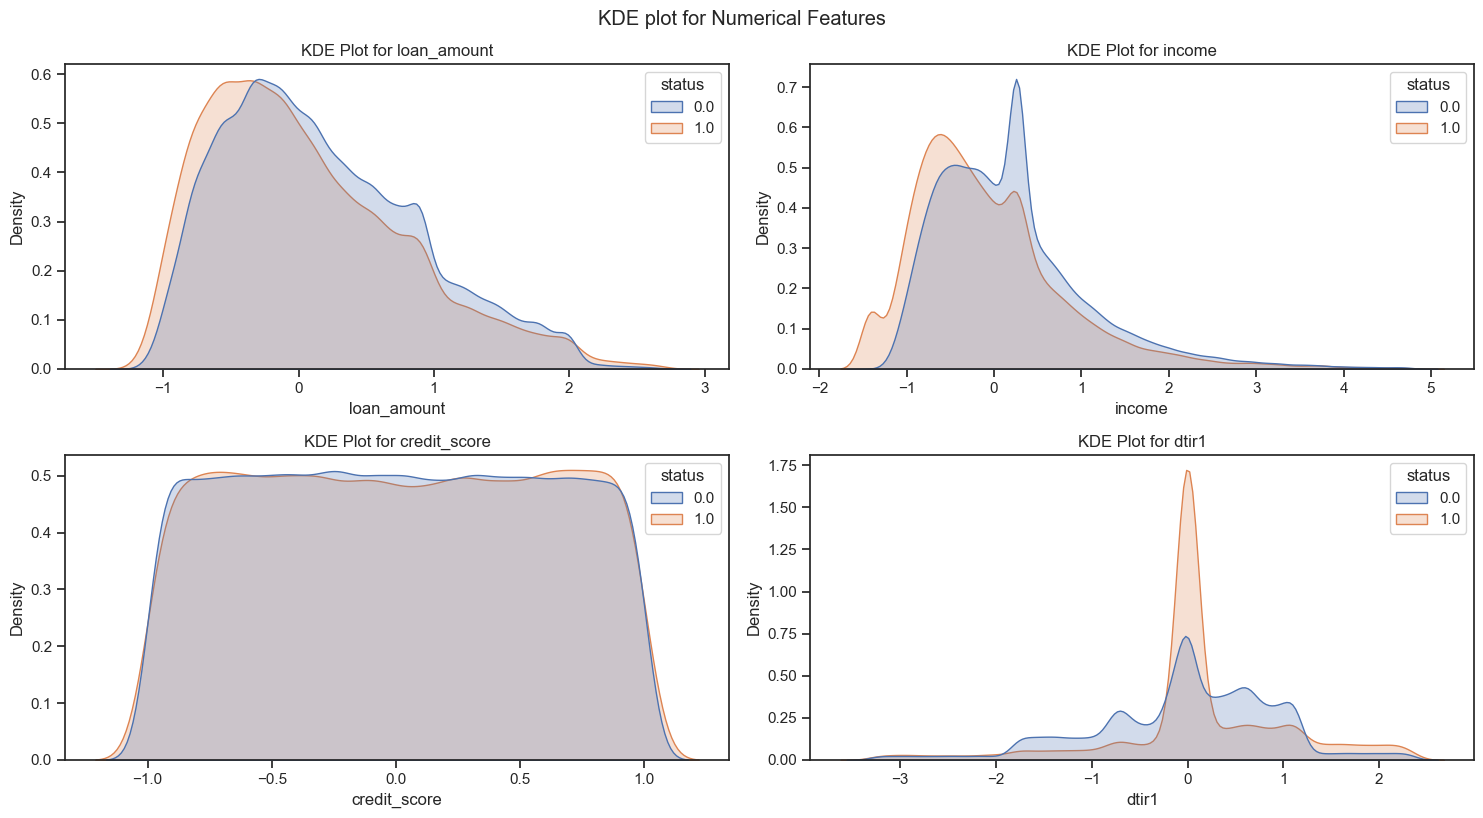

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Flatten the array of axes
axes = np.ravel(axes)

# Iterating through columns and create KDE plots
for i, col in enumerate(['loan_amount', 'income', 'credit_score', 'dtir1']):
    ax = axes[i]
    
    # KDE plot for each status
    sns.kdeplot(data=loanDF, x=col, hue='status', common_norm=False, fill=True, ax=ax)
    
    ax.set_title(f'KDE Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()

# The overall title for the entire subplot
fig.suptitle("KDE plot for Numerical Features", y=1.02)

# Saving the plot in plots folder
plt.savefig('../plots/2-KDE plot for Numerical Features.png')

plt.show()

### (3) Analyzing counts of categorical features by status

In [60]:
# For representation purposes: Using the dataset without categorical encoding

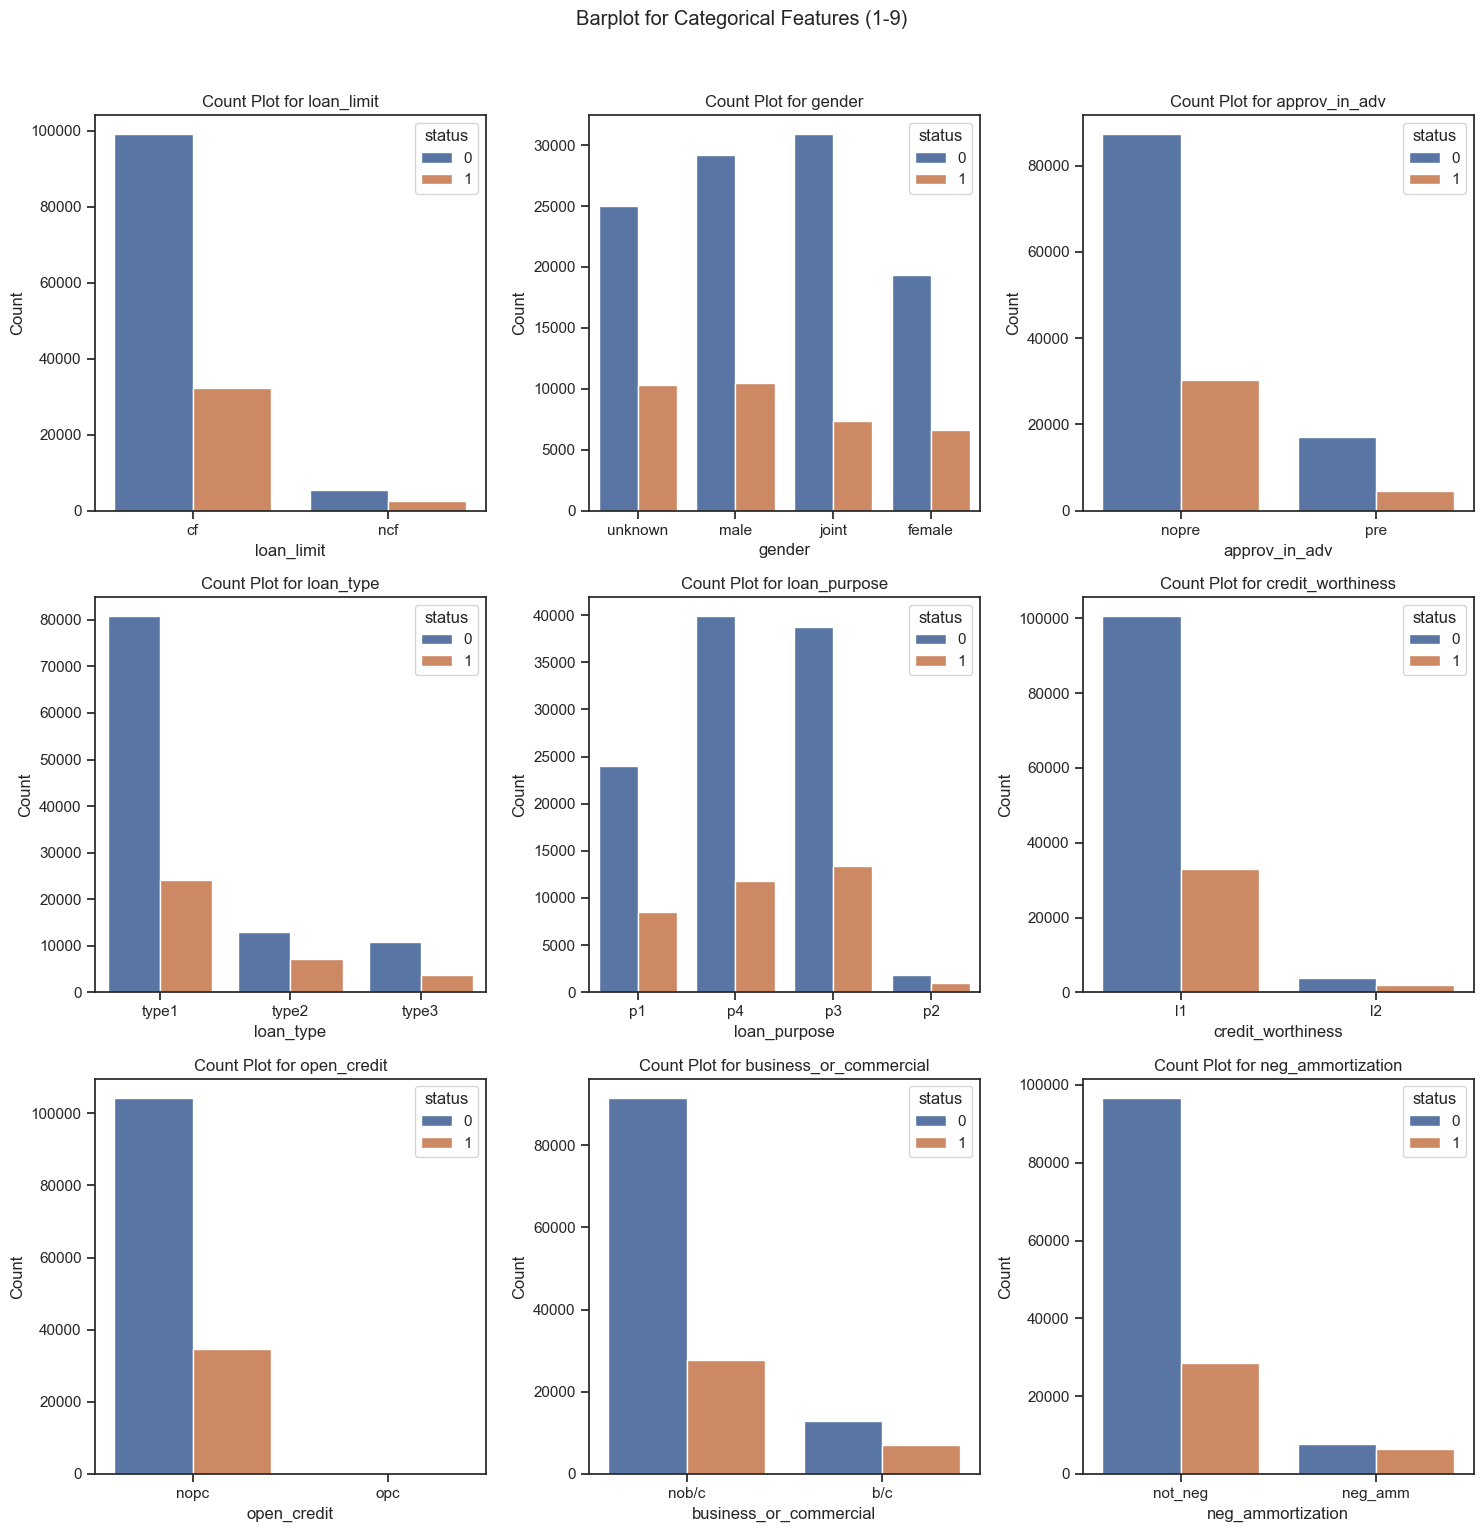

In [61]:
_, categorical_df_cols = get_numeric_categorical_cols(loanDF_cleaned)

part1_cols = categorical_df_cols[:9]

# Setting up subplots
ncols = 3
nrows = math.ceil(len(part1_cols)//ncols) # Using ceil to account for extra plots 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# Flatten the array of axes
axes = np.ravel(axes)

# Iterating through categorical features and create count plots
for i, feature in enumerate(part1_cols):
    ax = axes[i]    

    # Count plot for each gender feature
    sns.countplot(data=loanDF_cleaned, hue='status', x=feature, ax=ax)
    
    ax.set_title(f'Count Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


# The overall title 
fig.suptitle("Barplot for Categorical Features (1-9)", y=1.02)

# Saving the plot in plots folder
plt.savefig('../plots/3-Barplot for Categorical Features(1-9).png')

plt.tight_layout()
plt.show()

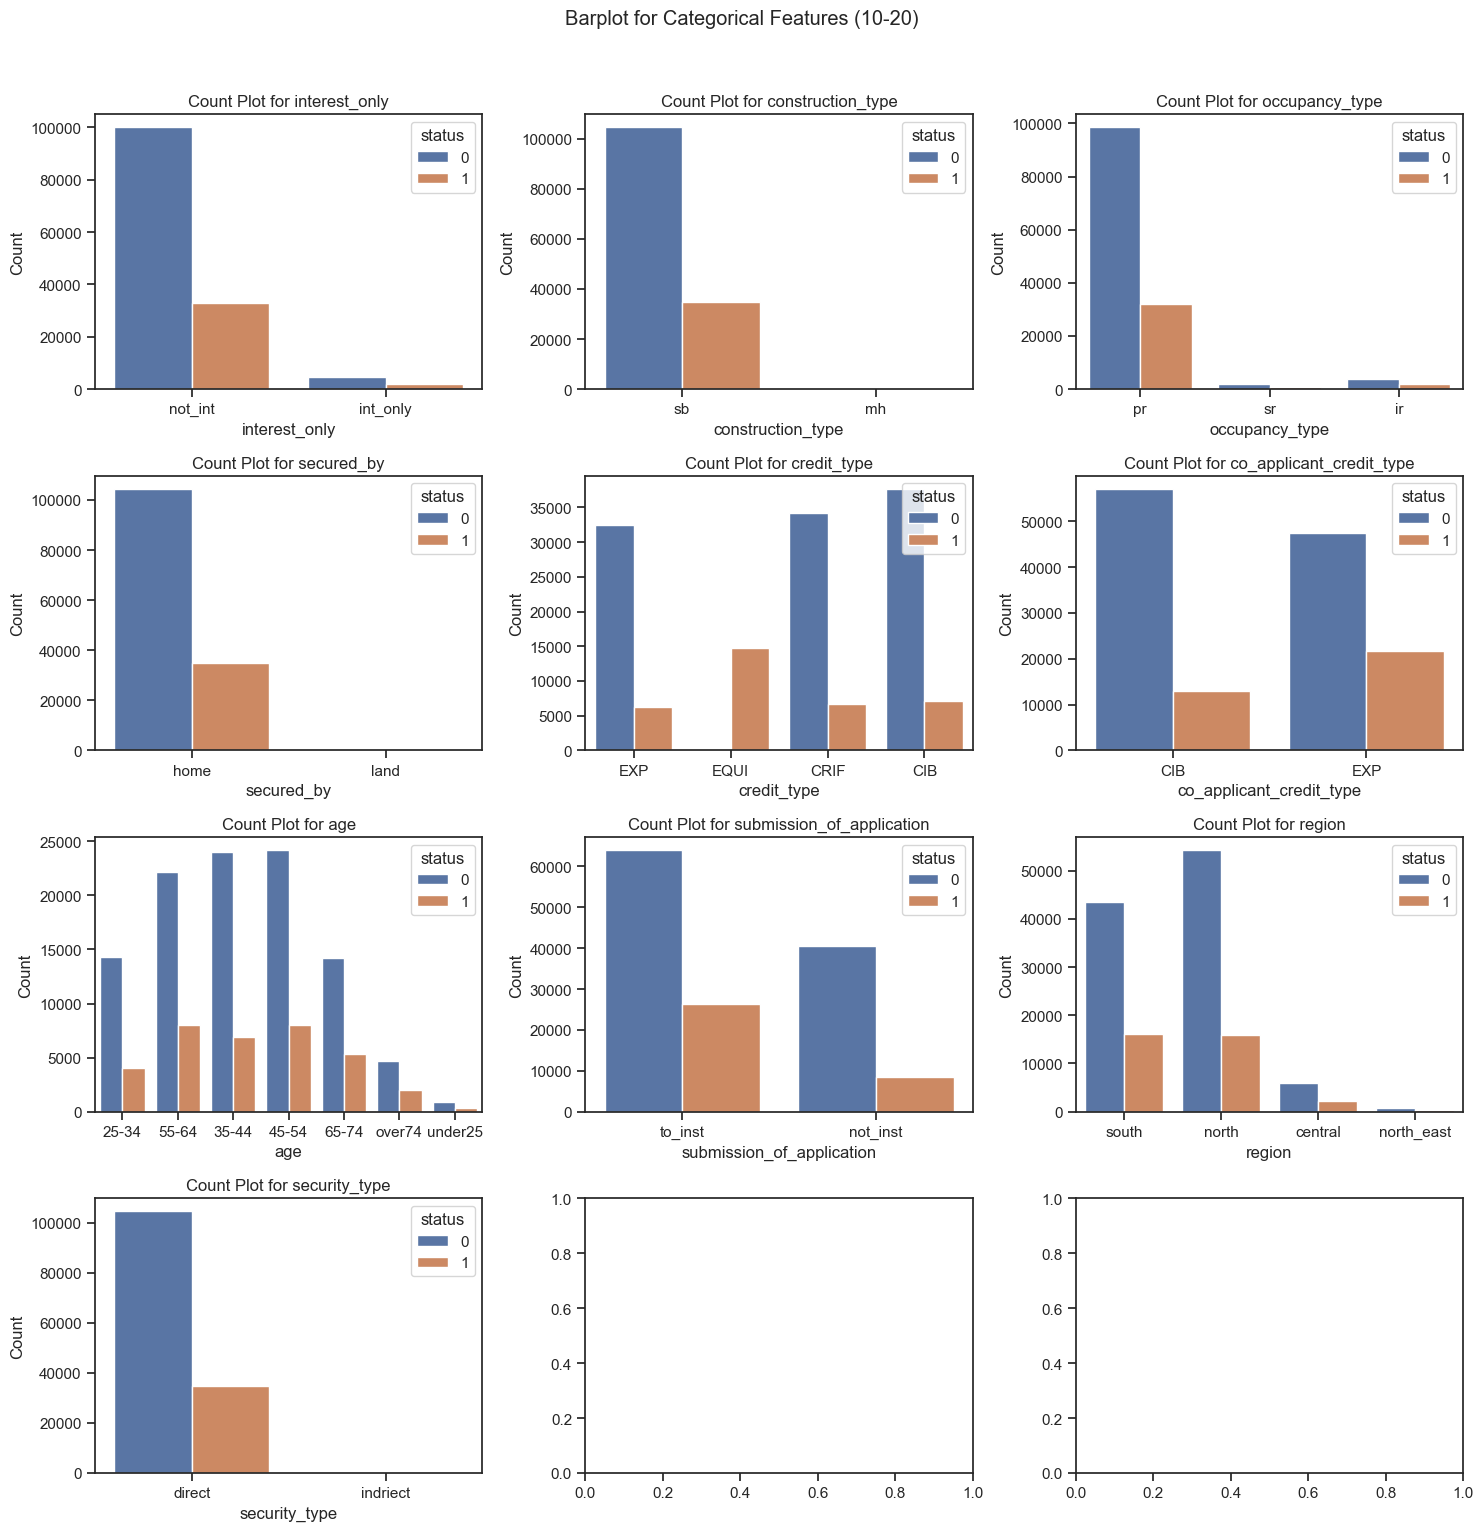

In [62]:
part2_cols = categorical_df_cols[9:]

# Setting up subplots
ncols = 3
nrows = math.ceil(len(part2_cols)//ncols) # Using ceil to account for extra plots 
fig, axes = plt.subplots(nrows=nrows+1, ncols=ncols, figsize=(15, 5*nrows))

axes = np.ravel(axes)

# Iterate through categorical features and create count plots
for i, feature in enumerate(part2_cols):
    ax = axes[i]

    # Count plot for each gender feature
    sns.countplot(data=loanDF_cleaned, hue='status', x=feature, ax=ax)
    
    ax.set_title(f'Count Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    

# Setting the overall title for the entire subplot
fig.suptitle("Barplot for Categorical Features (10-20)", y=1.02)

# Saving the plot in plots folder
plt.savefig('../plots/3-Barplot for Categorical Features(10-20).png')

plt.tight_layout()
plt.show()

In [63]:
# Iterating through categorical features and create count plots
for i, feature in enumerate(categorical_df_cols[10:]):
    ax = axes[i]

    # Count plot for each gender feature
    sns.countplot(data=loanDF_cleaned, hue='status', x=feature, ax=ax)
    
    ax.set_title(f'Count Plot for {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
# Saving the plot in plots folder
plt.savefig('../plots/Barplot for Categorical Features(1-10).png')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### (4) Correlation Matrix Analysis

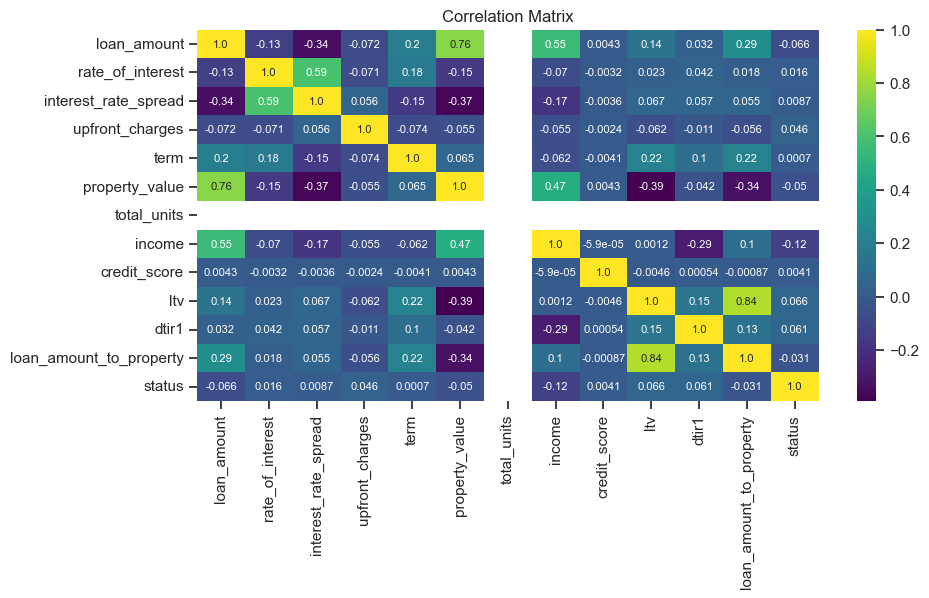

In [64]:
sns.heatmap(loanDF[numeric_cols].corr(), annot=True, fmt='.2', cmap='viridis', annot_kws={"size":8})

plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.title("Correlation Matrix")

# Saving the plot in plots folder
plt.savefig('../plots/4-Correlation Matrix.png')


### (5) Analyzing loan amount with income

<Figure size 1000x2000 with 0 Axes>

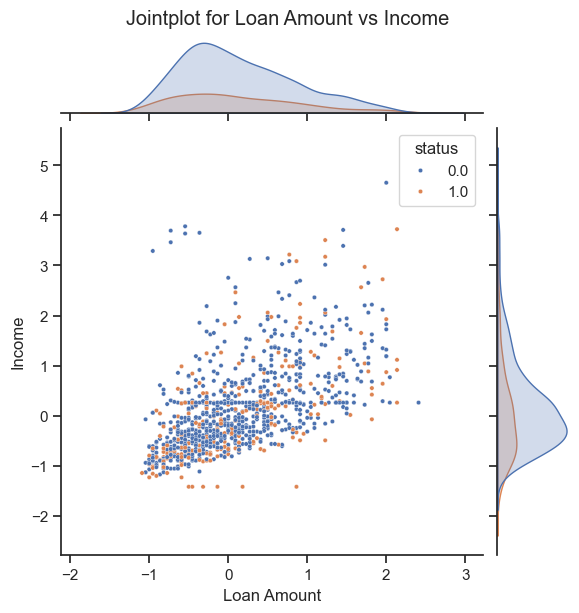

In [65]:
plt.figure(figsize=(10, 20))
sns.jointplot(x='loan_amount', y='income', hue='status', data=loanDF.sample(1000), kind='scatter', s=10)

# Setting labels
plt.xlabel('Loan Amount')
plt.ylabel('Income')

# plt.title("Jointplot: Loan Amount vs Income")
# Adjusting the placement of the title
plt.suptitle("Jointplot for Loan Amount vs Income", y=1.02)

# Save the figure
plt.savefig('../plots/5-Jointplot_Loan_Amount_vs_Income.png')


plt.show()


### (6) Exploring relationship between Interest Rate Spreaad and Property Value

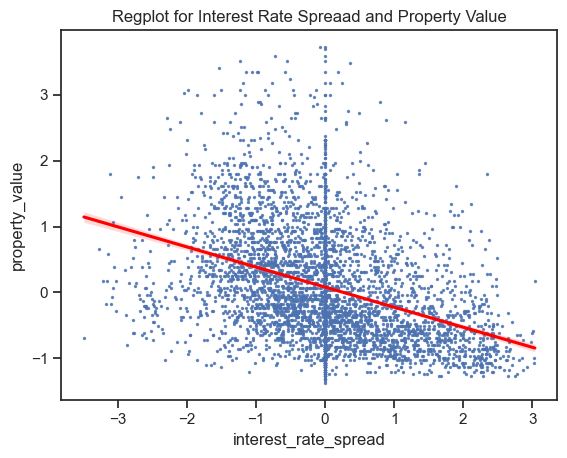

In [66]:
sns.regplot(x='interest_rate_spread', y='property_value', data=loanDF.sample(5000), scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.title("Regplot for Interest Rate Spreaad and Property Value")
plt.savefig('../plots/6-Regplot for Interest Rate Spreaad and Property Value.png')

### (7) Exploring relationship between loan amount, income, and interest rate

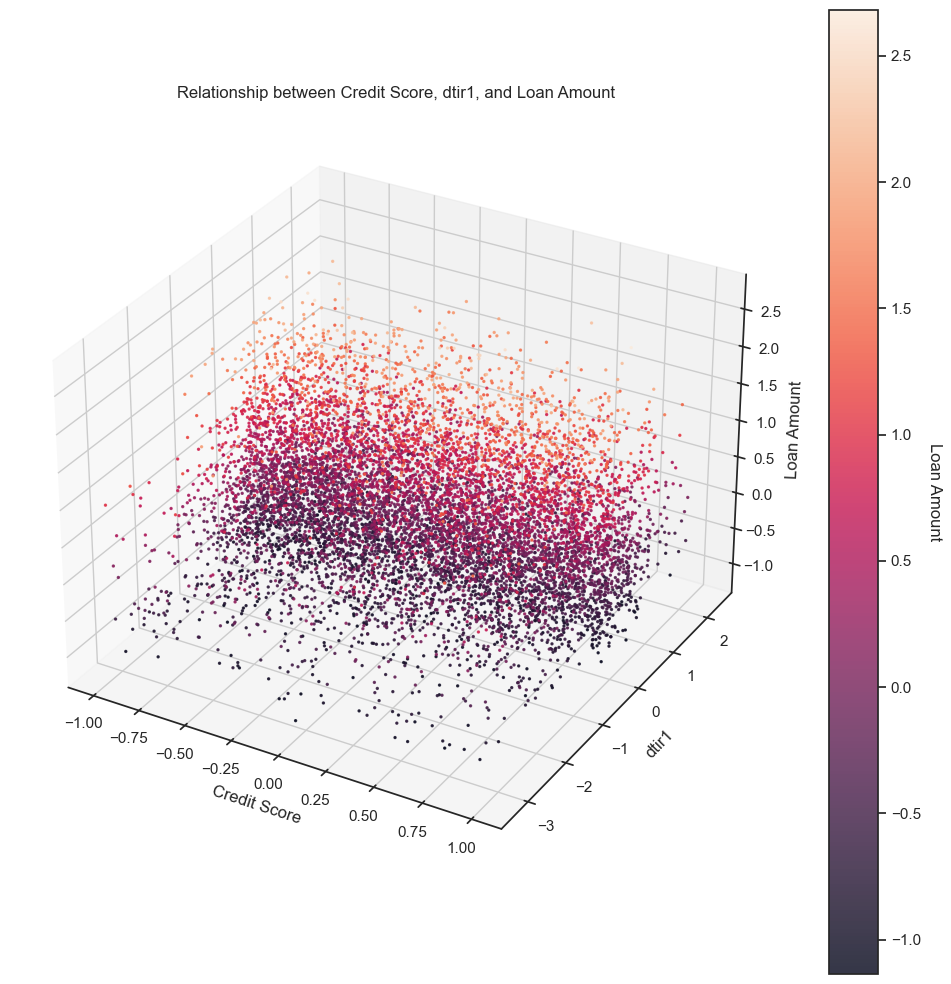

In [67]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

data = loanDF.sample(10000)

# Plotting the points
sc = ax.scatter(data['credit_score'], 
                data['dtir1'], 
                data['loan_amount'], 
                c=data['loan_amount'], s=2,
                # cmap = plt.cm.viridis_r,
                alpha=0.8)

# Set labels
ax.set_xlabel('Credit Score')
ax.set_ylabel('dtir1')
ax.set_zlabel('Loan Amount')


# Adding colorbar
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Loan Amount', rotation=270, labelpad=15)


plt.title("Relationship between Credit Score, dtir1, and Loan Amount")

# Saving the plot in plots folder
plt.savefig("../plots/7- 3d - Relationship between Credit Score, Income, and Loan Amount.png")
# Show the plot
plt.tight_layout()
plt.show()

### (8) Exploring region distribution using pie-chart

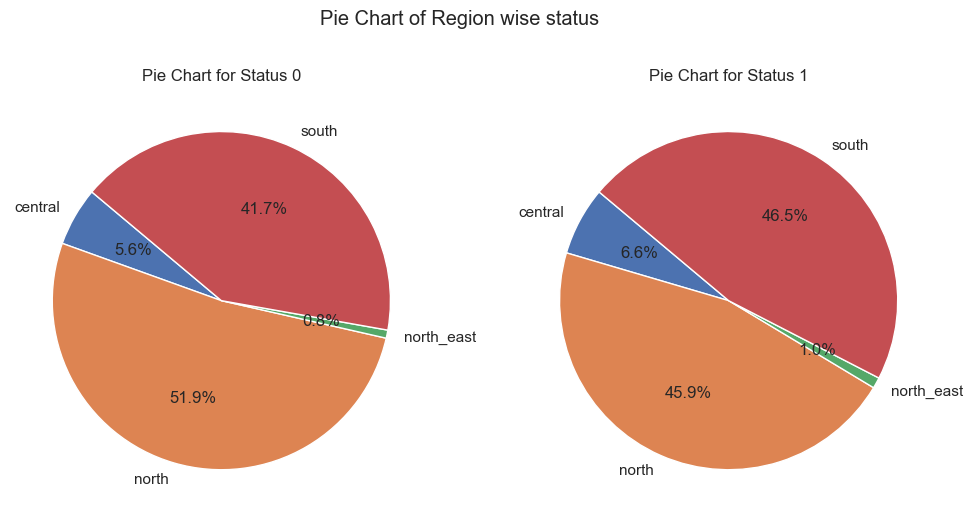

In [68]:
# Plotting subplots for full categorical dataset, before downsampling
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

region_df = categorical_df.groupby(['region', 'status']).size().reset_index(name='count')
filtered_df_0 = region_df[region_df['status'] == 0]
filtered_df_1 = region_df[region_df['status'] == 1]


# Plot for status 0
axs[0].pie(filtered_df_0['count'], labels=filtered_df_0['region'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Pie Chart for Status 0')

# Plot for status 1
axs[1].pie(filtered_df_1['count'], labels=filtered_df_1['region'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart for Status 1')

fig.suptitle("Pie Chart of Region wise status")
plt.savefig('../plots/8-Pie Chart of Region wise status')

plt.show()

### (9) Analysing loan amount and region

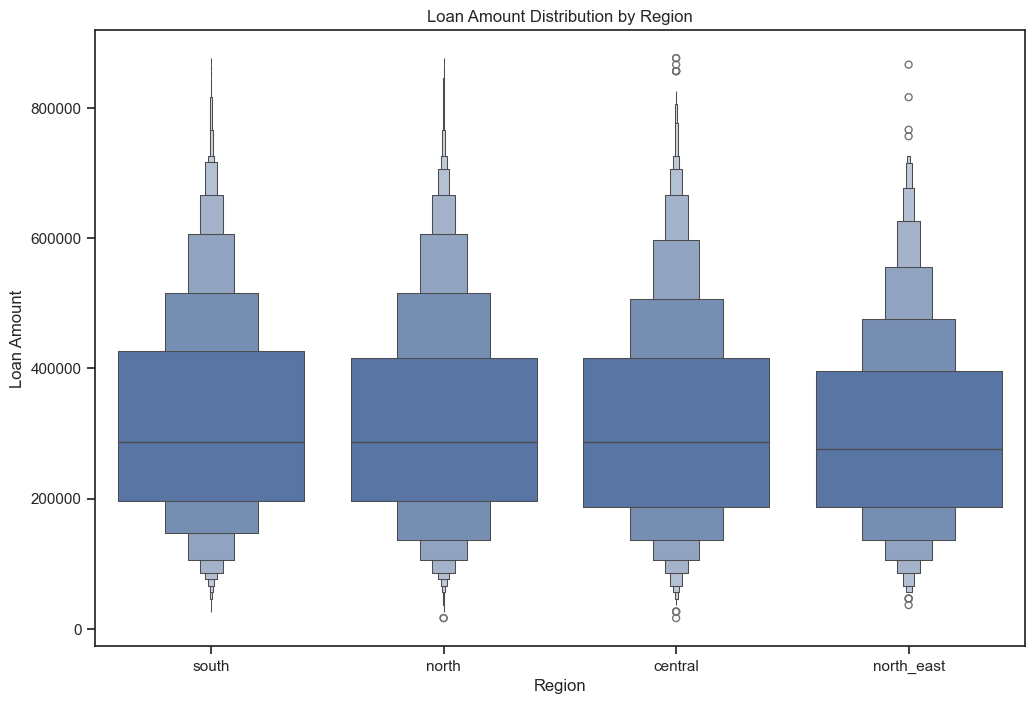

In [69]:
df = pd.concat([numerical_df, categorical_df], axis=1)
plt.figure(figsize=(12, 8))

# Boxen plot for Region and Loan Amount
sns.boxenplot(x='region', y='loan_amount', data=df)
plt.title('Loan Amount Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Loan Amount')


plt.savefig('../plots/9-Loan Amount Distribution by Region.png')

plt.show()


### (10) Analysis of credit score 

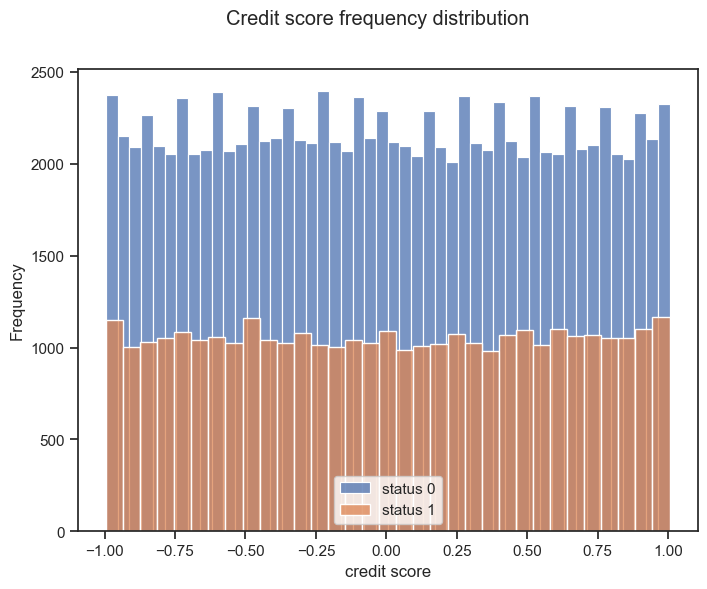

In [70]:
plt.figure(figsize=(8, 6))

creditScore_0 = loanDF.loc[loanDF['status']==0, 'credit_score']
creditScore_1 = loanDF.loc[loanDF['status']==1, 'credit_score']

sns.histplot(x=creditScore_0, label='status 0')
sns.histplot(x=creditScore_1, label='status 1')

plt.xlabel('credit score')
plt.ylabel('Frequency')
plt.legend(loc='lower center')

plt.suptitle("Credit score frequency distribution")
plt.savefig('../plots/10-Credit score frequency distribution.png')

plt.show()

### (11) Analysing Dept To Income Ratio and Income

<Figure size 1000x600 with 0 Axes>

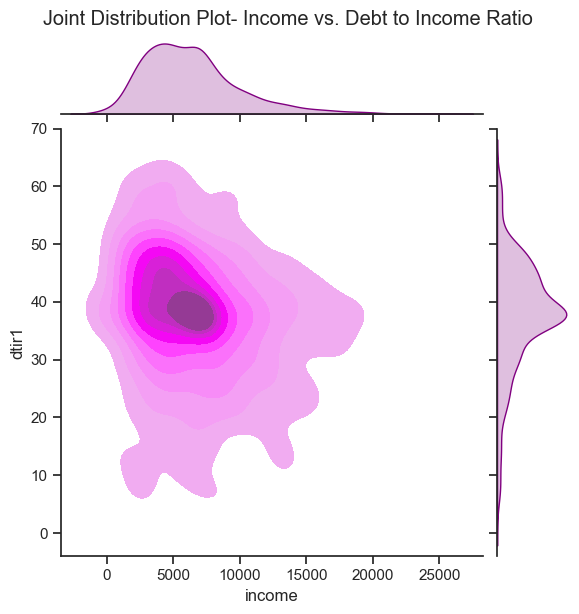

In [71]:
plt.figure(figsize=(10, 6))

# Joint distribution plot for Income and Debt to Income Ratio (dtir1)
sns.jointplot(x='income', y='dtir1', data=numerical_df.sample(1000), kind='kde', fill=True, color='purple')
plt.suptitle('Joint Distribution Plot- Income vs. Debt to Income Ratio', y=1.02)
plt.savefig('../plots/11-Joint Distribution Plot: Income vs. Debt to Income Ratio.png')
plt.show()
